In [1]:
# Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. Compute confusion 
# matrix, accuracy, error rate, precision and recall on the given dataset.
# Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [18]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [19]:
X = data.drop("Outcome", axis=1)  # Features
y = data["Outcome"]  # Target variable

In [20]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


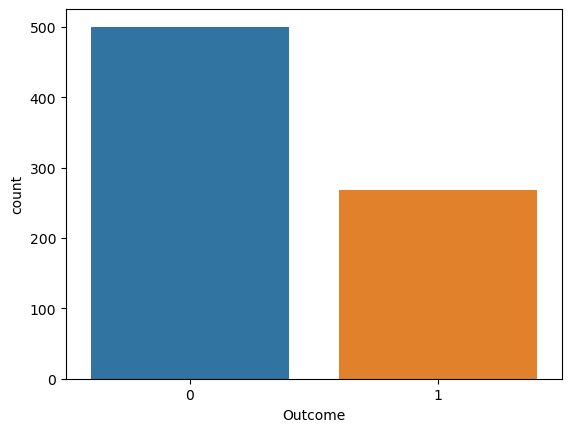

In [21]:
sns.countplot(x = y);

In [22]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
# 2. Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
X.shape

(768, 8)

In [14]:
X_train.shape

(614, 8)

In [15]:
X_test.shape

(154, 8)

In [30]:
# 3. Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train

array([[-0.52639686, -1.15139792, -3.75268255, ..., -4.13525578,
        -0.49073479, -1.03594038],
       [ 1.58804586, -0.27664283,  0.68034485, ..., -0.48916881,
         2.41502991,  1.48710085],
       [-0.82846011,  0.56687102, -1.2658623 , ..., -0.42452187,
         0.54916055, -0.94893896],
       ...,
       [ 1.8901091 , -0.62029661,  0.89659009, ...,  1.76054443,
         1.981245  ,  0.44308379],
       [-1.13052335,  0.62935353, -3.75268255, ...,  1.34680407,
        -0.78487662, -0.33992901],
       [-1.13052335,  0.12949347,  1.43720319, ..., -1.22614383,
        -0.61552223, -1.03594038]])

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
!pip install fit

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for fit: filename=fit-0.4.1-py3-none-any.whl size=34791 sha256=f85c4bf244ee141447809e4d988103acb6e5c773417d7f35044cfc9d45d89229
  Stored in directory: c:\users\asus\appdata\local\pip\cache\wheels\64\2a\dd\a8ced5773dc6bc4754ef8c9a9d1677631587de149157a2d2b6
Successfully built fit


In [58]:
# 4. Implement K-Nearest Neighbors (KNN)
# Choose the number of neighbors (k) based on your needs
knn = KNeighborsClassifier(n_neighbors=3)

In [59]:
knn.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [768, 614]

In [60]:
# 5. Predict and Evaluate
y_pred = knn.predict(X_test)
y_pred

NotFittedError: This KNeighborsClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [42]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate accuracy, error rate, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Error Rate:", error_rate)
print("Precision:", precision)
print("Recall:", recall)

Confusion Matrix:
[[81 18]
 [27 28]]
Accuracy: 0.7077922077922078
Error Rate: 0.29220779220779225
Precision: 0.6086956521739131
Recall: 0.509090909090909


In [12]:
# Accuracy: This measures the overall correctness of the classifier's predictions. In this case, the model is about 70.78% accurate.

# Error Rate: The error rate is the complement of accuracy (1 - accuracy), representing the proportion of incorrect predictions. Here, the error rate is approximately 29.22%.

# Precision: Precision measures the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). A higher precision indicates that when the model predicts the positive class, it's more likely to be correct. In this case, the precision is approximately 60.87%.

# Recall: Recall measures the ratio of true positive predictions to the total number of actual positive instances (true positives + false negatives). It's also known as the true positive rate or sensitivity. In this case, the recall is approximately 50.91%.